In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
expirations_with_data = []

with open('expirations.txt', 'r') as file:
    expirations = file.readlines()
    expirations = [line.strip() for line in expirations]  # Remove any trailing newline characters

for expiration in expirations:
    df = pd.read_csv(fr'implied\vix_options_{expiration}.csv')
    print(len(df),"entries in",expiration)
    if len(df) != 0:   
        expirations_with_data.append(expiration)

0 entries in 2021-06-18
0 entries in 2023-01-20
0 entries in 2021-08-20
0 entries in 2021-11-19
0 entries in 2022-01-21
0 entries in 2021-05-21
149 entries in 2021-04-28
349 entries in 2021-05-19
107 entries in 2021-08-18
120 entries in 2021-05-05
245 entries in 2021-06-16
48 entries in 2021-05-26
90 entries in 2021-10-20
77 entries in 2021-12-22
19 entries in 2021-11-17
105 entries in 2021-09-15
55 entries in 2021-05-12
175 entries in 2021-07-21


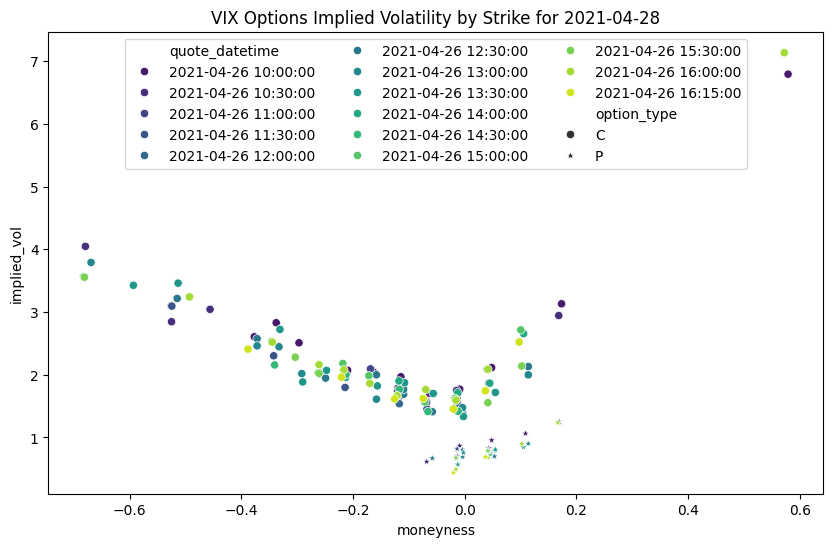

In [7]:
def view_vols(expiration):

    plt.figure(figsize=(10, 6))
    df = pd.read_csv(fr'implied\vix_options_{expiration}.csv')
    sns.scatterplot(x='moneyness', y='implied_vol', hue='quote_datetime',
                     style='option_type', markers={'C': 'o', 'P': '*'},
                    data=df, palette='viridis',)    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)
    plt.title(f'VIX Options Implied Volatility by Strike for {expiration}')

view_vols(expirations_with_data[0])

In [4]:
expirations_with_data.sort(key=lambda date: datetime.strptime(date, '%Y-%m-%d'))
with open('expirations_with_data.txt', 'w') as file:
    for expiration in expirations_with_data:
        file.write(f"{expiration}\n")
t0 = datetime.strptime(df.iloc[0]["quote_datetime"][:10], '%Y-%m-%d')
tau = [datetime.strptime(expiration, '%Y-%m-%d') - t0 for expiration in expirations_with_data]
tau = [t.days/365 for t in tau]
print(tau)


[0.005479452054794521, 0.024657534246575342, 0.043835616438356165, 0.06301369863013699, 0.0821917808219178, 0.13972602739726028, 0.2356164383561644, 0.31232876712328766, 0.38904109589041097, 0.4849315068493151, 0.5616438356164384, 0.6575342465753424]


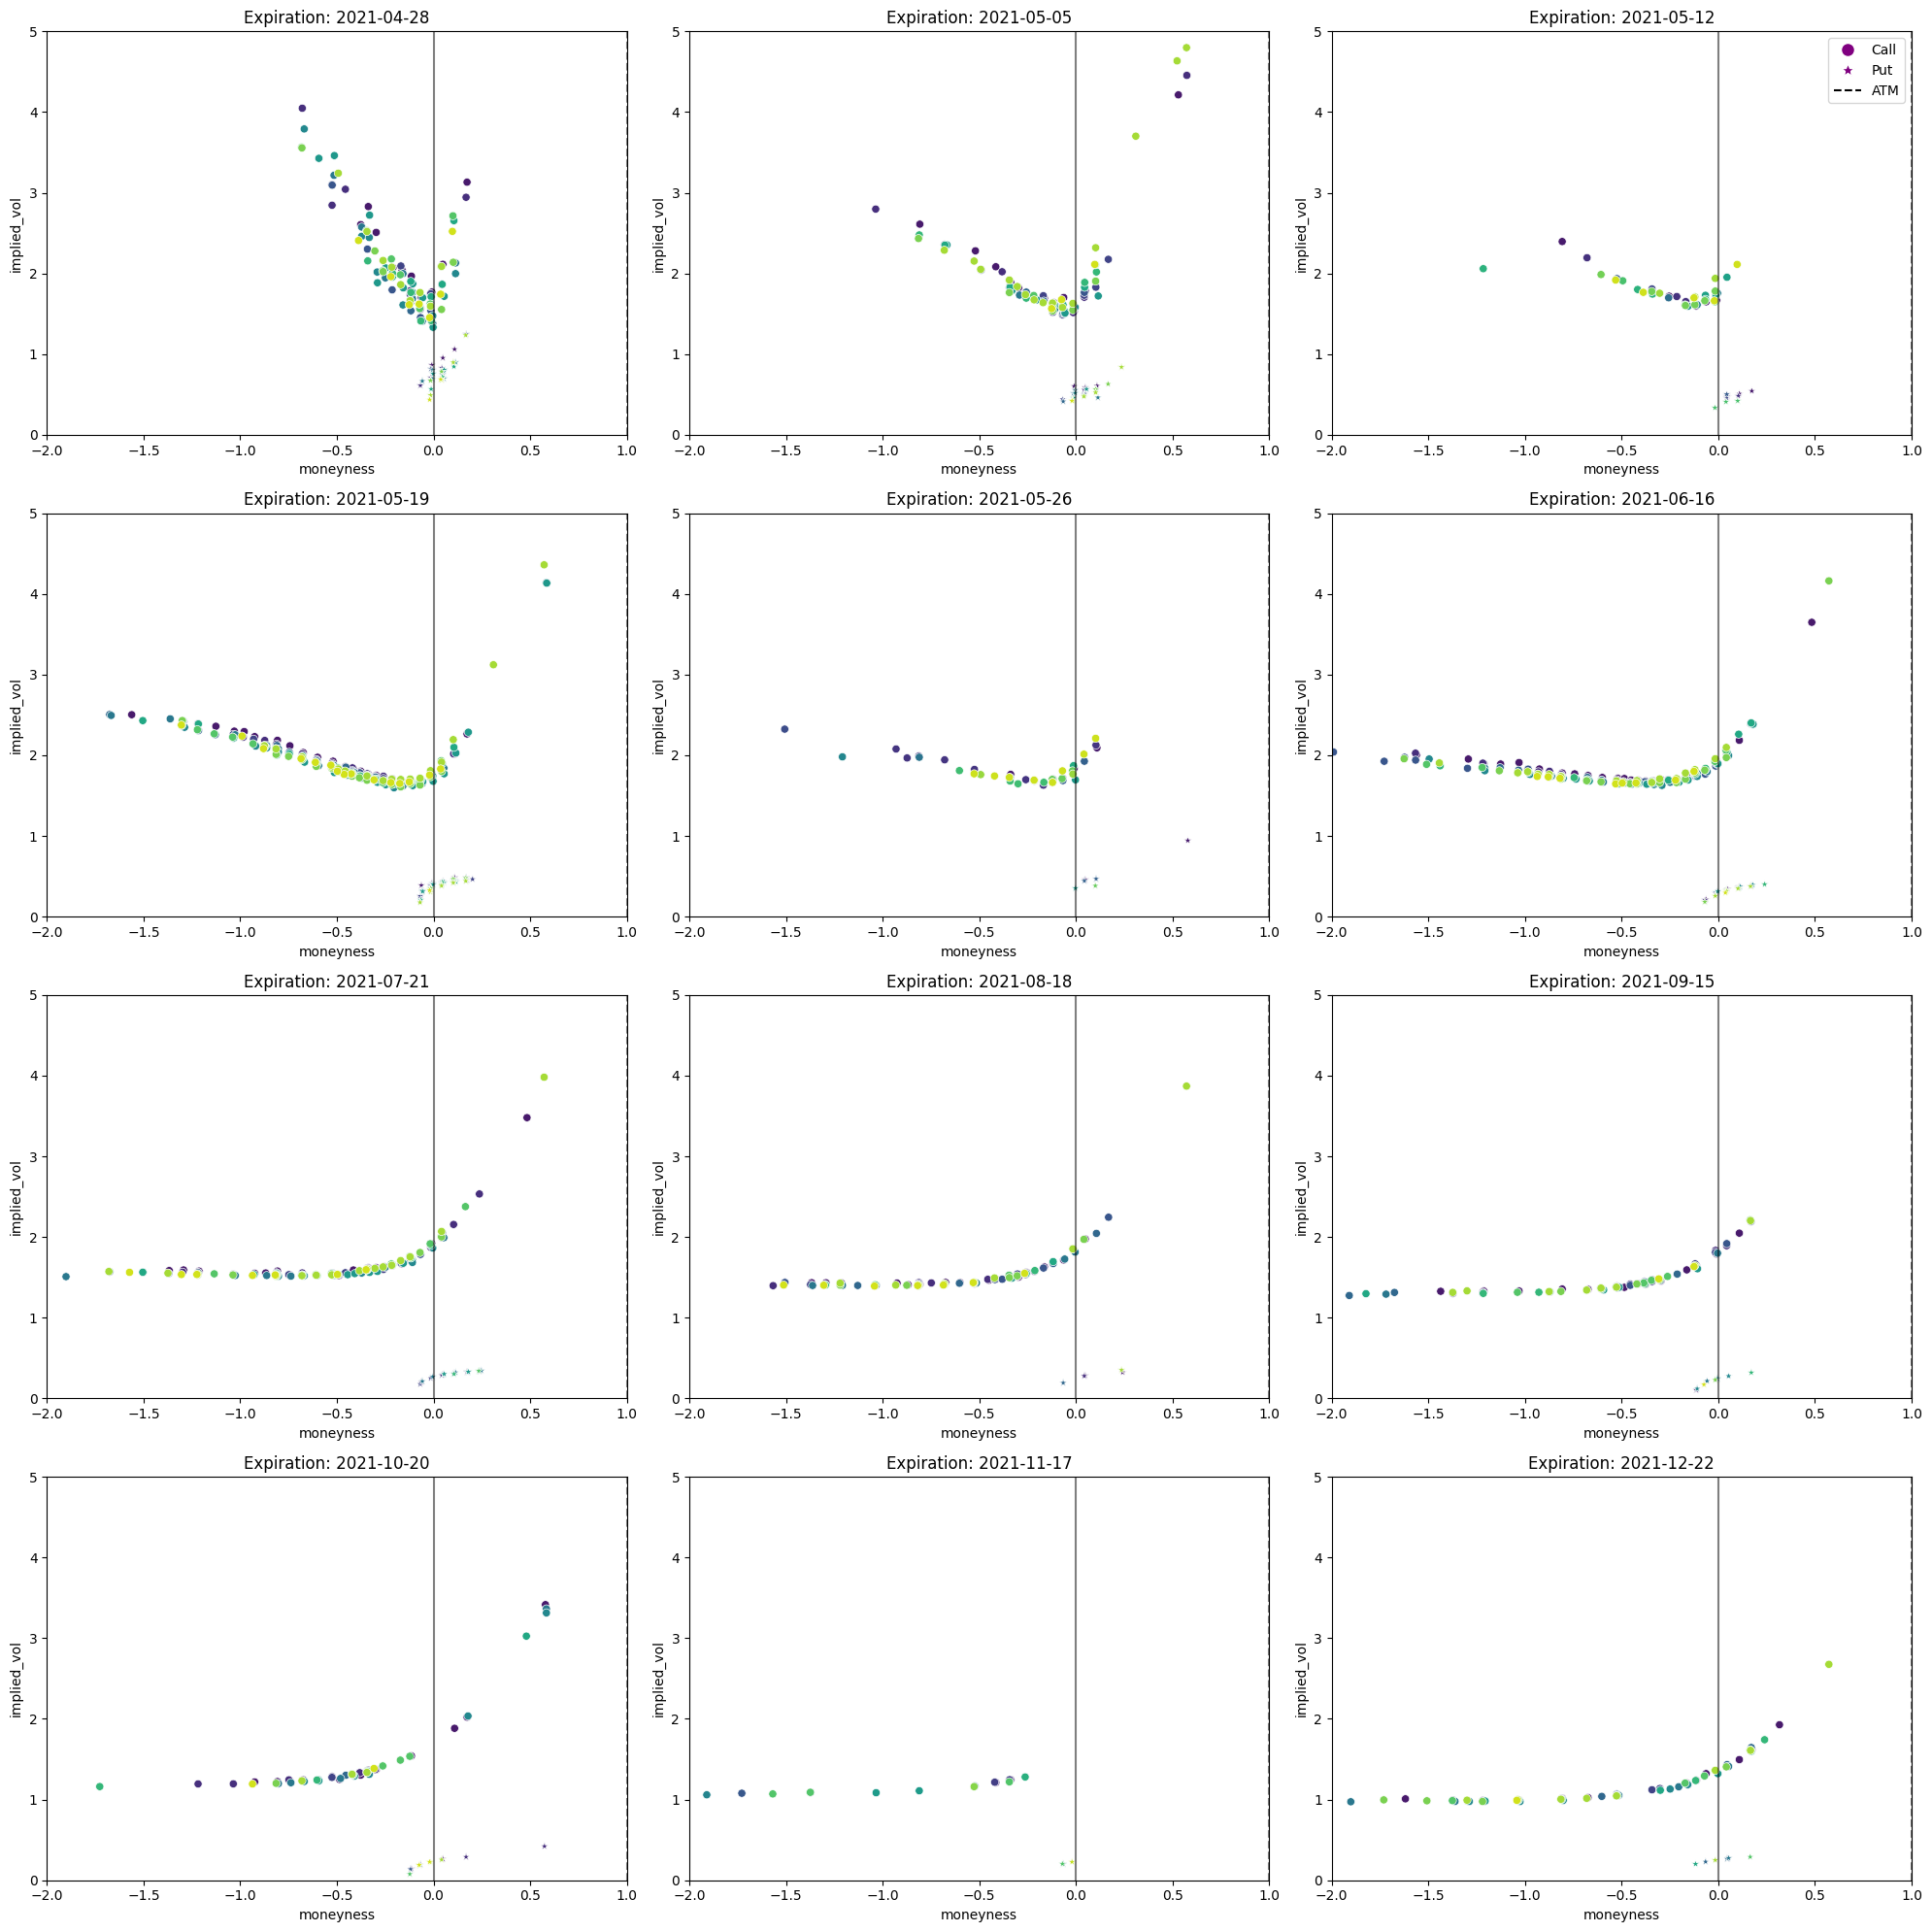

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

for i, expiration in enumerate(expirations_with_data):
    df = pd.read_csv(fr'implied\vix_options_{expiration}.csv')
    sns.scatterplot(x="moneyness", y='implied_vol', hue='quote_datetime',
                     style='option_type', markers={'C': 'o', 'P': '*'},
                       data=df, palette='viridis', ax=axes[i])
    underlying_bid_avg = df['underlying_bid'].mean()
    axes[i].axvline(x=1, color='black', linestyle='--',alpha=0.5)
    axes[i].set_ylim(0, 5)
    axes[i].set_xlim(-2, 1)
    axes[i].set_title(f'Expiration: {expiration}') 
    axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.5)
    if i == 2:
      axes[i].legend_.remove()
      handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10),
            plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='purple', markersize=10),
            plt.Line2D([0], [0], linestyle='--', color='k'),
            plt.Line2D([0], [0], linestyle='solid', color='red')]
      custom_labels = ['Call', 'Put', 'ATM']
      axes[i].legend(handles, custom_labels, loc='upper right')
    else:
       axes[i].legend_.remove()


plt.tight_layout()
plt.show()

AttributeError: PathCollection.set() got an unexpected keyword argument 'market'

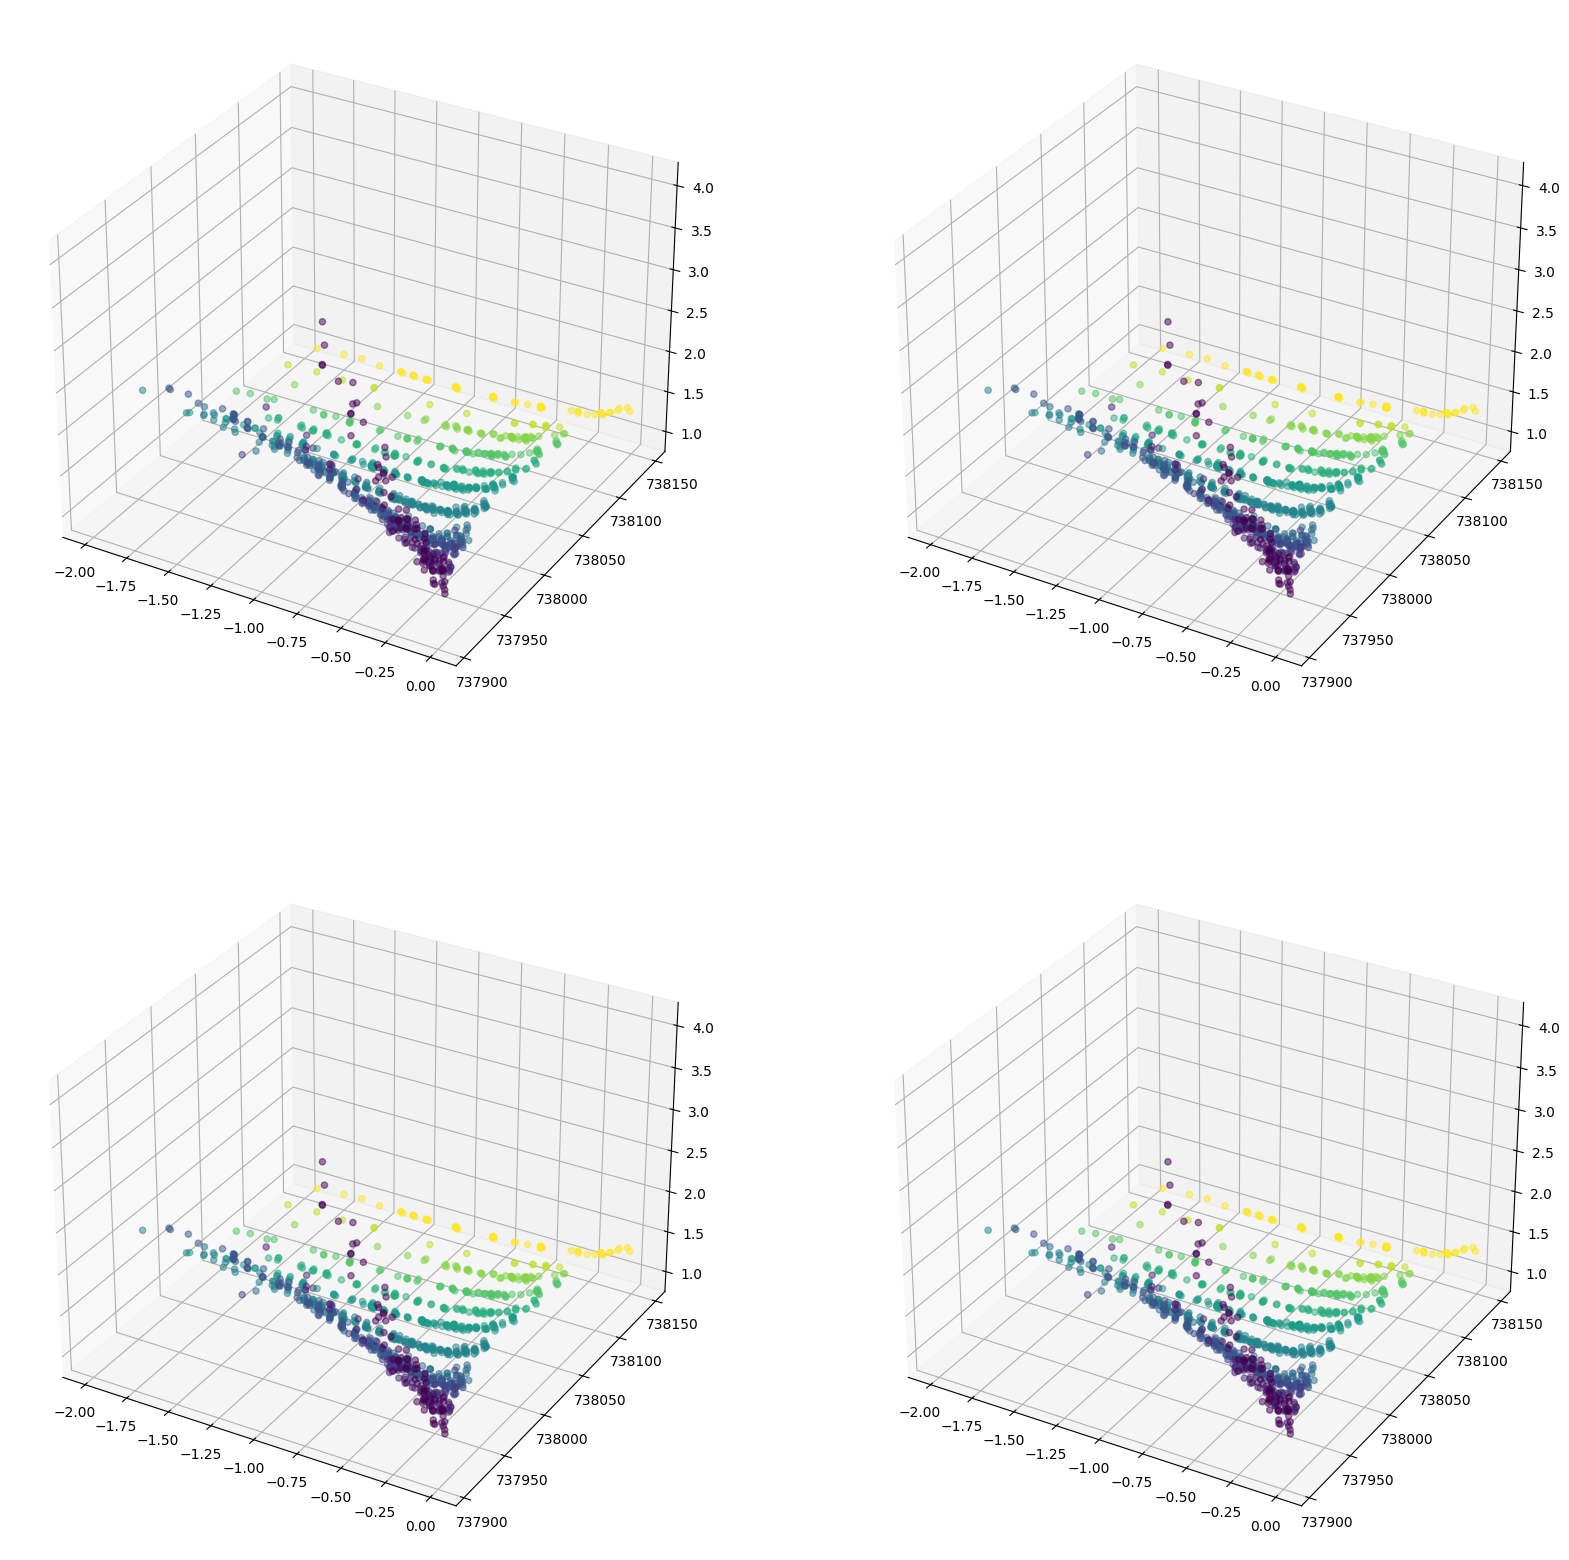

In [45]:

fig, axs = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'projection': '3d'})

# Define different view angles
view_angles = [(10, 0), (30, 45), (50, 90), (70, 135)]

for ax, angle in zip(axs.flatten(), view_angles):
    for expiration in expirations_with_data:
        df = pd.read_csv(fr'implied\vix_options_{expiration}.csv')
        df = df[df['option_type'] == "C"]
        df = df[df["moneyness"]<=0]
        df = df.sort_values(by='strike')
        moneyness = df['moneyness']
        implied_vols = df['implied_vol']
        expiration_num = datetime.strptime(expiration, '%Y-%m-%d').toordinal()
        ax.scatter(moneyness, [expiration_num] * len(moneyness), implied_vols, label=expiration, color=colors[expirations_with_data.index(expiration)], alpha=0.5)
for ax, angle in zip(axs.flatten(), view_angles):
    for expiration in expirations_with_data:
        df = pd.read_csv(fr'implied\vix_options_{expiration}.csv')
        df = df[df['option_type'] == "C"]
        df = df[df["moneyness"]>0]
        df = df.sort_values(by='strike')
        moneyness = df['moneyness']
        implied_vols = df['implied_vol']
        expiration_num = datetime.strptime(expiration, '%Y-%m-%d').toordinal()
        ax.scatter(moneyness, [expiration_num] * len(moneyness), implied_vols, label=expiration, color=colors[expirations_with_data.index(expiration)], alpha=0.5,market='*')
    
    
    ax.set_xlim(-2, 1)
    ax.set_xlabel('Moneyness log(S/K)')
    ax.set_ylabel('Expiration Date')
    ax.set_zlabel('Implied Volatility')
    ax.set_title('3D Scatter Plot of Implied Volatilities')
    ax.legend().remove()
    ax.set_yticks(expirations_num)
    ax.set_yticklabels(expirations_with_data)
    ax.view_init(elev=angle[0], azim=angle[1])

plt.tight_layout()
plt.show()